In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
import scipy
from scipy.optimize import minimize
import warnings

#suppress warnings
#warnings.filterwarnings('ignore')


#def negPoissontDist(n, lambda_val):
 #   return -np.exp(-lambda_val) * (lambda_val**n) / np.math.factorial(n)

#def maximize(n):
 #   result = scipy.optimize.minimize(negPoissontDist, x0=[10], args=(n,))
  #return result


#This function gives the probability of getting n counts for a given bin
def poissant_distribution(n, lambda_val):
    return np.exp(-lambda_val) * (lambda_val**n) / np.math.factorial(n) #numpy gets mad at the math here but can just ignore

#This is just so we can use the minimize function from scipy
def negative_probability_distribution(lambda_val, n):
    return -poissant_distribution(n, lambda_val)

#This will find the lambda that gives the highest probability of getting a given n, n would be our measured counts per bin
def maximize_distribution(n):
    result = scipy.optimize.minimize(negative_probability_distribution, x0=[10], bounds=[(0,None)], args=(n,))
    return result.x

fixed_n = 13

optimal_lambda = maximize_distribution(fixed_n)
print(f"Lambda: {optimal_lambda}")



Lambda: [13.00012571]


In [2]:
import pandas as pds

#importing and sorting data
ge_data = pds.read_csv("SuperCDMS/PhysRevD.99.062001-data/MarchAprilFinal.txt", skiprows=1, \
                         names=['time', 'blah'], \
                         delim_whitespace=False
                     )

ge_data = ge_data.sort_values(by='time')

print (ge_data.head(10))

t = np.asarray(ge_data["time"], dtype=np.float32)

print (t)

        time    blah
9   506.1574  5.2894
5   507.4013  5.9058
8   509.4632  5.6750
10  509.8995  5.2232
13  510.0812  5.0349
3   512.5145  6.3243
19  512.7067  4.2205
12  513.7324  5.0628
14  513.8779  4.9122
4   514.5219  6.1499
[ 506.1574  507.4013  509.4632  509.8995  510.0812  512.5145  512.7067
  513.7324  513.8779  514.5219  516.8201  517.7107  518.5185  519.2819
  519.8351  524.4211  525.2859  525.2859  526.9375  528.7008  529.4175
  530.1161  534.9125  535.2761  536.9121  537.7742  543.2328  550.717
  551.226   553.132   553.3139  553.7683  554.0956  557.6922  558.5466
  565.1764  566.9474  567.3552  571.5335  574.8757  576.3014  578.0828
  578.1919  580.6901  583.0324  584.7126  587.0472  593.4147  593.986
  594.7132  596.1207  602.9245  616.2568  616.7476  623.1592  623.5592
  627.683   627.9011  637.3381  637.8289  638.3016  638.3275  648.4008
  651.4703  651.517   652.3974  652.5064  660.6087  661.3799  661.4708
  665.4129  670.0093  674.8498  676.0211  678.1193  680.363  

In [3]:
min_t=np.min(t)

#construct histogram from our data, every bin is roughly 12 hours
counts, bins = np.histogram(t-min_t,bins=72)
thing = (bins[:-1]+bins[1:])/2
error1 = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28]
error2 = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30]
ntot = counts
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=20:
        ntot_plus[i] = error2[ncount]-ncount
        ntot_minus[i] = ncount-error1[ncount]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)

#probabilities = np.array([poissant_distribution(n, 2) for n in counts]) i don't know what i was doing here

#optimal_lambda = maximize_distribution(counts, probabilities)


In [4]:
print(counts)


[13  9  5  6  5  7  6  1  2  4  4  5  5  5  6  2  3  3  0  3  3  5  5  4
  3  4  2  3  1  3  4  0  3  1  3  4  2  3  1  2  2  1  2  2  1  2  1  1
  3  2  1  0  0  1  1  1  1  1  1  2  1  2  0  1  0  2  1  1  1  1  1  2]


In [5]:
#initializing the array of optimal lambdas
lambda_array = []
for i in range(len(counts)):
    result=maximize_distribution(counts[i])
    lambda_array.extend(result)
# initializing array of probabilities for each bin
prob_array = []
for i in range(len(lambda_array)):
    result=poissant_distribution(counts[i], lambda_array[i])
    prob_array.extend([result])

print(prob_array)

[0.10993981418158977, 0.1317556400094152, 0.17546736976780875, 0.16062314091249244, 0.17546736976780875, 0.14900277966571845, 0.16062314091249244, 0.3678794411714423, 0.2706705664624776, 0.1953668145629145, 0.1953668145629145, 0.17546736976780875, 0.17546736976780875, 0.17546736976780875, 0.16062314091249244, 0.2706705664624776, 0.2240418073508977, 0.2240418073508977, 4.540199096288481e-05, 0.2240418073508977, 0.2240418073508977, 0.17546736976780875, 0.17546736976780875, 0.1953668145629145, 0.2240418073508977, 0.1953668145629145, 0.2706705664624776, 0.2240418073508977, 0.3678794411714423, 0.2240418073508977, 0.1953668145629145, 4.540199096288481e-05, 0.2240418073508977, 0.3678794411714423, 0.2240418073508977, 0.1953668145629145, 0.2706705664624776, 0.2240418073508977, 0.3678794411714423, 0.2706705664624776, 0.2706705664624776, 0.3678794411714423, 0.2706705664624776, 0.2706705664624776, 0.3678794411714423, 0.2706705664624776, 0.3678794411714423, 0.3678794411714423, 0.2240418073508977, 0

In [6]:
#nevermind all this stuff but will be useful when we actually do the model function
# some function parameters can be initialized as constants?
#x = np.linspace(0,926,num=100) #i cant remember why we chose 926, workedwell for the other plots
#print (function(x,926,271.2,1))
#alpha = 274.32 #half life of germ 71 in hours
#tstop = 1440 #hours

#print(len(counts))
#print(len(prob_array))

counts1=np.asarray(counts)
prob1=np.asarray(prob_array)


# Model function is the poissant distribution
def likelihood_func(theta, n): 
    lambda_val = theta
    sterling = 1 #sterling approximation for large values of n so the factorial function does not run into problems
    if n > 20: 
        sterling = n*np.log(n)-n
    else:
        sterling = np.log(np.math.factorial(n))

    model = -lambda_val + n*np.log(lambda_val)-sterling #natural log of L(lambda, n) = e^-lambda * lambda^n / n!
    return model


lambda_true = 5.0
np.random.seed(69)
nll = lambda *args: -likelihood_func(*args)
initial = np.asarray([5]) 
soln = scipy.optimize.minimize(nll, initial, args=(counts1[0])) #I think it has a problem with the size of the arrays in the input of the likelihood function??
lambda_val_ml = soln.x
print(soln.x)
#idk


[13.00000421]


In [7]:
def prior(theta): #this sets the prior conditions of our parameters
    lambda_val = theta
    if lambda_val>0:
        return 0.0
    return -np.inf

def prob(theta, n):
    lp = prior(theta)
    if not np.isfinite(lp):
        return -np.inf 
    result = lp + likelihood_func(theta, n)
    if np.isnan(np.asarray([result])):
        return -np.inf
    return result

bin1cnts=np.asarray([counts1[0]])

pos = soln.x + 1e-4 * np.random.randn(32, 1)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, prob, args=(bin1cnts)
)

#print(pos)
sampler.run_mcmc(pos, 5000, progress=True);
#run_mcmc(initial_state, nsteps, **kwargs), initial_state is initial position vector, 
print("hi3")


100%|██████████| 5000/5000 [00:12<00:00, 406.34it/s]

hi3


[27.26459666]
(10432, 1)


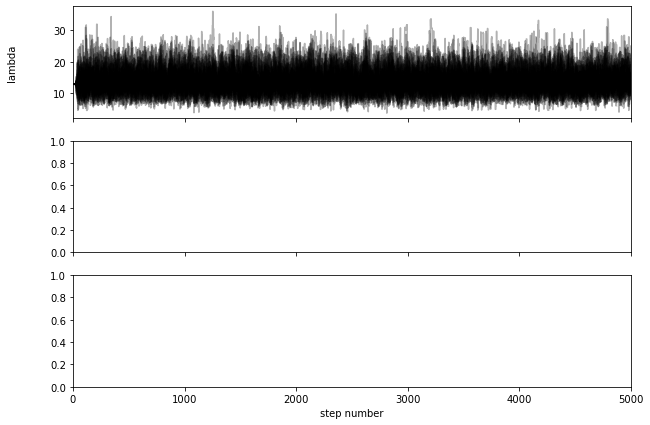

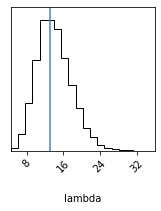

In [8]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["lambda"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

#autocorrelation stuffs
tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, truths=lambda_val_ml
);